# Problem Set 4
Sophie Sun

DSGE EXERCISES

In [49]:
# import packages for all exercises
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rouwen
import LinApp_Deriv as ld
import LinApp_FindSS as lf
import LinApp_Solve as ls
from collections import namedtuple
from numba import njit
from scipy.optimize import fsolve

EXERCISE 1

$$ \frac{1}{e^{z_t}K_t^\alpha - Ae^{z_t}K_t^\alpha} = 
\beta E_t \frac{\alpha e^{z_{t+1}}(Ae^{z_t}K_t^\alpha)^{\alpha - 1}}
{e^{z_{t+1}}(Ae^{z_t}K_t^\alpha)^\alpha - Ae^{z_{t+1}}(Ae^{z_t}K_t^\alpha)^\alpha} $$

$$ \frac{1}{e^{z_t}K_t^\alpha(1-A)} = \beta E_t \frac{\alpha (Ae^{z_t}K_t^\alpha)^{-1}}{1-A} $$

$$ A = \beta \alpha $$
 
$$ K_{t+1} = \beta \alpha e^{z_t}K_t^\alpha $$

EXERCISE 2

$$ Characteristic \ equations: $$

$$ w_t = (1 - \alpha)e^{z_t}K_t^\alpha L_t^{-\alpha} $$

$$ r_t = \alpha e^{z_t}K_t^\alpha L_t^{\alpha - 1} $$

$$ c_t = (1 - \tau)[w_tl_t(r_t - \delta)k_t] + k_t + T_t - k_{t+1} $$

$$ \frac{1}{c_t} = \beta E_t \{\frac{1}{c_{t+1}}[(r_{t+1} - \delta)(1 - \tau) + 1]\} $$

$$ \frac{\alpha}{1 - l_t} = \frac{1}{c_t} w_t(1 - \tau)$$

$$ T_t = \tau [w_tl_t + (r_t - \delta)k_t] $$

$$ z_t = (1 - \rho _z) \overline{z} + \rho _zz_{t - 1} + \epsilon_t^z $$ 

EXERCISE 3

$$ Characteristic \ equations: $$

$$ w_t = (1 - \alpha)e^{z_t}K_t^\alpha L_t^{-\alpha} $$

$$ r_t = \alpha e^{z_t}K_t^{\alpha - 1} L_t^{1 - \alpha} $$

$$ c_t = (1 - \tau)[w_tl_t(r_t - \delta)k_t] + k_t + T_t - k_{t+1} $$

$$ \frac{1}{c_t^\gamma} = \beta E_t \{\frac{1}{c_{t + 1}^\gamma}[(r_{t + 1} - \delta)(1 - \tau) + 1]\} $$

$$ \frac{\alpha}{1 - l_t} = \frac{1}{c_t^\gamma}w_t(1 - \tau)$$

$$ T_t = \tau [w_tl_t + (r_t - \delta)k_t] $$

$$ z_t = (1 - \rho _z) \overline{z} + \rho _zz_{t - 1} + \epsilon_t^z $$ 

EXERCISE 4

$$ Characteristic \ equations: $$

$$ w_t = (1 - \alpha)e^{z_t}L_t^{\eta - 1}[\alpha K_t^\eta + (1 - \alpha)L_t^\eta]^{\frac{1 - n}{n}} $$

$$ r_t = \alpha e^{z_t}K_t^{\eta - 1}[\alpha K_t^\eta + (1 - \alpha)L_t^\eta]^{\frac{1 - n}{n}} $$

$$ c_t = (1 - \tau)[w_tl_t(r_t - \delta)k_t] + k_t + T_t - k_{t+1} $$

$$ \frac{1}{c_t^\gamma} = \beta E_t \{\frac{1}{c_{t + 1}^\gamma}[(r_{t + 1} - \delta)(1 - \tau) + 1]\} $$

$$ \alpha (1 - l_t)^{-\xi} = \frac{1}{c_t^\gamma}w_t(1 - \tau)$$

$$ T_t = \tau [w_tl_t + (r_t - \delta)k_t] $$

$$ z_t = (1 - \rho _z) \overline{z} + \rho _zz_{t - 1} + \epsilon_t^z $$ 


EXERCISE 5

$$ Characteristic \ equations: $$

$$ w_t = (1 - \alpha)K_t^\alpha (L_te^{z_t})^{-\alpha}$$

$$ r_t = \alpha K_t^{\alpha -1} (L_te^{z_t})^{1 -\alpha} $$

$$ c_t = (1 - \tau)[w_t(r_t - \delta)k_t] + k_t + T_t - k_{t+1} $$

$$ \frac{1}{c_t^\gamma} = \beta E_t \{\frac{1}{c_{t + 1}^\gamma}[(r_{t + 1} - \delta)(1 - \tau) + 1]\} $$

$$ T_t = \tau [w_t + (r_t - \delta)k_t] $$

$$ z_t = (1 - \rho _z) \overline{z} + \rho _zz_{t - 1} + \epsilon_t^z $$ 

$$ Steady-state \ equations: $$

$$ \overline{w} = (1 - \alpha)\overline{k}^\alpha e^{\overline{z}})^{-\alpha}$$

$$ \overline{r} = \alpha \overline{k}^{\alpha - 1} e^{\overline{z}(1 -\alpha)} $$

$$ \overline{c} = (1 - \tau)[\overline{w}(\overline{r} - \delta)\overline{k}] + \overline{T} $$

$$ \frac{1}{\overline{c}^\gamma} = \beta E_t \{\frac{1}{\overline{c}^\gamma}[(\overline{r} - \delta)(1 - \tau) + 1]\} $$

$$ \overline{T} = \tau [\overline{w} + (\overline{r} - \delta)\overline{k}] $$

$$ 0 = \epsilon_t^{\overline{z}} $$

$$ Algebraic \ solution: \overline{k} = e^{\overline{z}} [\frac{1 - \beta}{\alpha \beta (1 - \tau)} + \frac{\delta}{\alpha}]^{\frac{1}{\alpha - 1}} $$

In [2]:
# set parameters
γ = 2.5
β = 0.98
α = 0.40
δ = 0.10
zbar = 0
τ = 0.05
# steady state capital equation
kbar = ((1 - β) / (α * β * (1 - τ)) + δ / α) ** (1 / (α - 1))
# steady state output equation
ybar = kbar ** α
# steady state investment equation
ibar = δ * kbar
# print results
print(f"The steady-state of capital is {kbar}, the steady-state of output is {ybar}, and the steady-state of investment is {ibar}.")

The steady-state of capital is 7.287497950692988, the steady-state of output is 2.213254613918843, and the steady-state of investment is 0.7287497950692988.


In [3]:
# numerically solve for steady states
def ss(k, γ, β, α, δ, zbar, τ):
    r = α * (k / (np.exp(zbar))) ** (α - 1)
    return 1 - (β * ((r - δ) * (1 - τ) + 1))
# find root
kbarinfo = opt.root(ss, 1, args = (γ, β, α, δ, zbar, τ))
kbar = kbarinfo.x[0]
ybar = kbar ** α
ibar = δ * kbar
print(f"The steady-state of capital is {kbar}, the steady-state of output is {ybar}, and the steady-state of investment is {ibar}.")

The steady-state of capital is 7.287497950692982, the steady-state of output is 2.213254613918842, and the steady-state of investment is 0.7287497950692983.


EXERCISE 6

$$ Characteristic \ equations: $$

$$ w_t = (1 - \alpha)K_t^\alpha (L_te^{z_t})^{-\alpha}$$

$$ r_t = \alpha K_t^{\alpha -1} (L_te^{z_t})^{1 -\alpha} $$

$$ c_t = (1 - \tau)[w_t(r_t - \delta)k_t] + k_t + T_t - k_{t+1} $$

$$ \frac{1}{c_t^\gamma} = \beta E_t \{\frac{1}{c_{t + 1}^\gamma}[(r_{t + 1} - \delta)(1 - \tau) + 1]\} $$

$$ \alpha (1 - l_t)^{-\xi} = \frac{1}{c_t^\gamma}w_t(1 - \tau)$$

$$ T_t = \tau [w_tl_t + (r_t - \delta)k_t] $$

$$ z_t = (1 - \rho _z) \overline{z} + \rho _zz_{t - 1} + \epsilon_t^z $$ 

$$ Steady-state \ equations: $$

$$ \overline{w} = (1 - \alpha)\overline{k}^\alpha \{\overline{l}e^{\overline{z}}\}^{-\alpha}$$

$$ \overline{r} = \alpha \overline{k}^{\alpha - 1} \{\overline{l}e^{\overline{z}}\}^{1 -\alpha} $$

$$ \overline{c} = (1 - \tau)[\overline{w}(\overline{r} - \delta)\overline{k}] + \overline{T} $$

$$ \frac{1}{\overline{c}^\gamma} = \beta E_t \{\frac{1}{\overline{c}^\gamma}[(\overline{r} - \delta)(1 - \tau) + 1]\} $$

$$ \alpha (1 - \overline{l})^{-\xi} = \frac{1}{c_t^\gamma}\overline{w}(1 - \tau)$$

$$ \overline{T} = \tau [\overline{w}\overline{l} + (\overline{r} - \delta)\overline{k}] $$

$$ 0 = \epsilon_t^{\overline{z}} $$

$$ Algebraic \ solution: \overline{k} = \overline{l}e^{\overline{z}} [\frac{1 - \beta}{\alpha \beta (1 - \tau)} + \frac{\delta}{\alpha}]^{\frac{1}{\alpha - 1}} $$

In [4]:
# set parameters
γ = 2.5
ξ = 1.5
β = 0.98
α = 0.40
a = 0.5
δ = 0.10
zbar = 0
τ = 0.05
# numerically solve for steady states
def ss(params, γ, ξ, β, α, a, δ, zbar, τ):
    k, l = params
    r = α * (k / (np.exp(zbar))) ** (α - 1)
    w = (1 - α) * (k / (l * np.exp(zbar)))**(α)
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + T
    eq1 = 1 - l * (β * ((r - δ) * (1 - τ) + 1))
    eq2 = (a / (1 - l)**(ξ)) - 1 / (c ** (γ)) * w * (1 - τ)
    return eq1, eq2
klbarinfo = opt.root(ss, 0.5 * np.ones(2), args=(γ, ξ, β, α, a, δ, zbar, τ))
kbar, lbar = klbarinfo.x[0], klbarinfo.x[1]
rbar = α * kbar ** (α - 1) * (lbar * np.exp(zbar)) ** (1 - α)
wbar = (1 - α) * kbar ** α * (lbar * np.exp(zbar)) ** (-α)
ybar = (kbar ** α) * (lbar ** (1 - α))
ibar = kbar - (1 - δ) * kbar
print(f"The steady-state of capital is {kbar}, the steady-state of labor is {lbar}, the steady-state of interest rates is {rbar}, the steady-state of wages is {wbar}, the steady-state of output is {ybar}, and the steady-state of investment is {ibar}.")

The steady-state of capital is 0.3510749788031881, the steady-state of labor is 0.6310094529584087, the steady-state of interest rates is 0.5686454696963741, the steady-state of wages is 0.47456625717144835, the steady-state of output is 0.4990929905504586, and the steady-state of investment is 0.035107497880318805.


LINEARIZATION EXERCISES

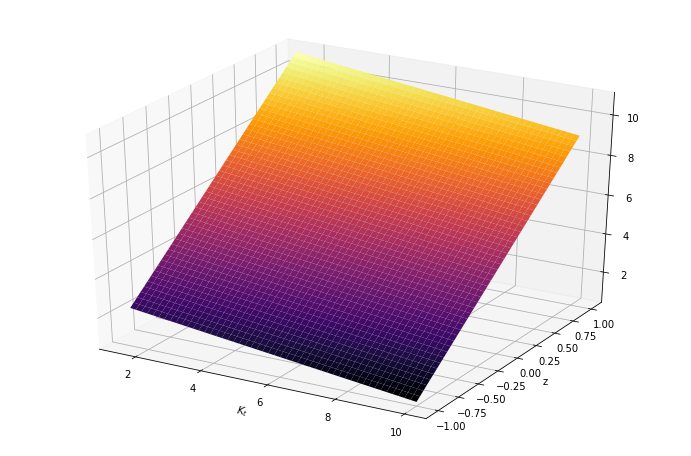

In [5]:
# EXERCISE 1
# set parameters
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02
A = α * β
K = A ** (1 / (1 - α))
F = (α * K ** (α - 1)) / (K ** α - K)
G = -(α * K ** (α - 1) * (α + K ** (α - 1))) / (K ** α - K)
H = (α ** 2 * K ** (2 * (α - 1))) / (K ** α - K)
L = -(α * K ** (2 * (α - 1))) / (K ** α - K)
M = (α ** 2 * K ** (2 * (α - 1))) / (K ** α - K)
P = (-G - np.sqrt(G ** 2 - 4 * F * H)) / (2 * F)
Q = -(L * ρ + M) / (F * ρ + F * P + G)
# create capital and productivity graphs
K_t = np.linspace(1.5, 10)
z_t = np.linspace(-1, 1)
# meshgrid
Kmesh, zmesh = np.meshgrid(K_t, z_t)     
# calculate K'
def Kprime(cap, prod):
    return cap + P * (Kmesh - cap) + Q * prod
# Kprime = lambda cap, prod: cap + P * (Kmesh - cap) + Q * prod
y = Kprime(Kmesh, zmesh)
# plot graph
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Kmesh, zmesh, y.T, cmap='inferno')
ax.set(xlabel='$K_t$', ylabel='z')
plt.show()

In [6]:
# EXERCISE 2
# repeat above, replacing K with k = lnK

EXERCISE 3
$$ E_T \{FP\widetilde{X}_t + FQ\widetilde{Z}_{t+1} + GP\widetilde{X}_{t-1} + GQ\widetilde{Z}_t + H\widetilde{X}_{t-1} + LN\widetilde{Z}_t + L\epsilon_{t+1} + M\widetilde{Z}_t\} $$ 

$$ = \ E_t\{FP^2\widetilde{X}_{t-1} + FPQ\widetilde{Z}_{t} + FQN\widetilde{Z}_t + FQ\epsilon_{t+1} + GP\widetilde{X}_{t-1} + GQ\widetilde{Z}_t + H\widetilde{X}_{t-1} + LN\widetilde{Z}_t + L\epsilon_{t+1} + M\widetilde{Z}_t \}$$

$$ = \ E_t\{FP^2\widetilde{X}_{t-1} + FPQ\widetilde{Z}_t + FQN\widetilde{Z}_t + FQ\epsilon_{t+1} + GP\widetilde{X}_{t-1} + GQ\widetilde{Z}_t + H\widetilde{X}_{t-1} + LN\widetilde{Z}_t + L\epsilon_{t+1} + M\widetilde{Z}_t\} $$

$$ = \ FP^2\widetilde{X}_{t-1} + FPQ\widetilde{Z}_t + FQN\widetilde{Z}_t + GP\widetilde{X}_{t-1} + GQ\widetilde{Z}_t + H\widetilde{X}_{t-1} + LN\widetilde{Z}_t + M\widetilde{Z}_t $$

$$ = \ (FP^2 + GP + H)\widetilde{X}_{t-1} + (FPQ + FQN + GQ + LN + M)\widetilde{Z}_t $$

$$ = \ [(FP + G)P + H]\widetilde{X}_{t-1} + [(FQ + L)N + (FP + G)Q + M]\widetilde{Z}_t = 0 $$

In [20]:
# EXERCISE 4
# set parameters 
γ = 2.5
ξ = 1.5 
β = 0.98
α = 0.40
a = 0.5
δ = 0.10
zbar = 0
ρ_z = 0.9
τ = 0.05
# numerically solve for steady states
def ss(params, γ, ξ, β, α, a, δ, zbar, τ):
    k, l = params
    r = α * (k / (l * np.exp(zbar))) ** (α - 1)
    w = (1 - α) * (k / (l * np.exp(zbar)))**(α)
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + T
    eq1 = β * ((r - δ) * (1 - τ) + 1) - 1
    eq2 = c ** (-γ) * w * (1 - τ) - a * (1 - l) ** (-ξ)
    return eq1, eq2
def ss_array(params):   
    γ, ξ, β, α, a, δ, zbar, τ = params
    klbarinfo = opt.root(ss, 0.5 * np.ones(2), args=(γ, ξ, β, α, a, δ, zbar, τ))
    kbar, lbar = klbarinfo.x[0], klbarinfo.x[1]
    rbar = α * kbar ** (α - 1) * (lbar * np.exp(zbar)) ** (1 - α)
    wbar = (1 - α) * kbar ** α * (lbar * np.exp(zbar)) ** (-α)
    ybar = (kbar ** α) * (lbar ** (1 - α))
    ibar = kbar - (1 - δ) * kbar
    Tbar = τ * (wbar * lbar + (rbar - δ) * kbar)
    cbar = (1 - τ) * (wbar * lbar + (rbar - δ) * kbar) + Tbar
    return np.array([kbar, lbar, rbar, wbar, ybar, ibar, Tbar, cbar])
params = np.array([γ, ξ, β, α, a, δ, zbar, τ])
print(ss_array(params))

[4.22522903 0.57979145 0.12148228 1.32795277 1.28322611 0.4225229
 0.04303516 0.86070321]


# EXERCISE 5 DOESN'T WORK FOR SOME REASON :(
ɛ = 1e-8
dim = len(params)
derivatives = np.zeros((dim, dim))
ss = ss_array(params)
for i in range(dim):
    params1 = params.copy()
    params1[i] += ɛ
    derivatives[:, i] = (ss_array(params1) - ss) / ɛ
print(derivatives.round(1))

In [35]:
# EXERCISE 6

params = ["a", "α", "β", "δ", "γ", "ρ", "σ", "τ", "ξ"]
BaselineModel = namedtuple("BaselineModel", params)
m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)
def u(m, c, l):
    return ((c ** (1.0 - m.γ) - 1.0) / (1.0 - m.γ) + m.a * ((1.0 - l)**(1.0 - m.ξ) - 1.0) / (1.0 - m.ξ))

def u1c(m, c, l):
    return c ** (-m.γ)

def u1l(m, c, l):
    return (- m.a * (1.0 - l) ** (-m.ξ))

def f(m, k, l, z):
    return (k ** m.α * (l * np.exp(z)) ** (1.0 - m.α))

def f1k(m, k, l, z):
    return (m.α * (l/k * np.exp(z)) ** (1.0 - m.α))

def f1l(m, k, l, z):
    return ((1.0 - m.α) * np.exp(z)**(1.0 - m.α) * (k / l) ** m.α)

def variables(m, ktp1, k_t, l_t, z_t):
    w_t = f1l(m, k_t, l_t, z_t)
    r_t = f1k(m, k_t, l_t, z_t)
    T_t = m.τ * (w_t * l_t + (r_t - m.δ) * k_t)
    c_t = (1 - m.τ) * (w_t * l_t + (r_t - m.δ) * k_t) + k_t + T_t - ktp1
    c_t = max(c_t, 1e-8)
    return c_t, r_t, T_t, w_t

def eqs(m, ktp2, ltp1, ktp1, l_t, k_t, ltm1, ztp1, z_t):
    c_t, r_t, T_t, w_t = variables(m, ktp1, k_t, l_t, z_t)
    ctp1, rtp1, Ttp1, wtp1 = variables(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.δ) * (1 - m.τ) + 1.0
    intertemp = u1c(m, c_t, l_t) - m.β * u1c(m, ctp1, ltp1) * rr_tp1
    intratemp = u1l(m, c_t, l_t) + u1c(m, c_t, l_t) * w_t * (1.0 - m.τ)
    return np.array([intertemp, intratemp])

def ss(m):
    sol = lambda x: eqs(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    solution = opt.root(sol, np.array([0.5, 0.85]))
    return solution.x
kbar, lbar = ss(m)
cbar, rbar, Tbar, wbar = variables(m, kbar, kbar, lbar, 0.0)

def deriv(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)

def linearize(m, kbar, lbar, ϵ =1e-6):
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    γ_ss = eqs(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)
    dim = len(γ_ss)
    Dmat = np.empty((dim, 8))
    CEsplat = lambda x: eqs(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += ϵ
        Dmat[:, i] = deriv(CEsplat, x, xtilde)
    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]
    return F, G, H, L, M
F, G, H, L, M = linearize(m, kbar, lbar)
N = ρ_z * np.eye(2)
def solve_P(P, F, G, H, M):
    P = P.reshape((2, 2))
    eq1 = F @ P @ P + G @ P + H
    return eq1.flatten()
x0 = np.zeros(4)
P = opt.root(solve_P, x0, args=(F, G, H, M)).x.reshape(2, 2)
def solve_Q(Q, F, ρ_z, P, G, L):
    return F @ Q * ρ_z + (F @ P + G) @ Q + (L * ρ_z + M)
x0 = np.zeros(2)
Q = opt.root(solve_Q, x0, args=(F, ρ_z, P, G, L)).x

array([[ 0.91529275,  0.        ],
       [-0.02633543,  0.        ]])

In [36]:
print(F, G, H, L, M, N, P, Q)

[[-4.22623769  5.44191867]
 [-0.         -0.        ]] [[  8.5666152   -5.61221554]
 [  5.33163184 -14.89888287]] [[-4.31700912 -0.        ]
 [-5.27237248 -0.        ]] [ 3.1551835 -0.       ] [-3.25392039 -3.00365571] [[0.9 0. ]
 [0.  0.9]] [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]] [ 0.54504859 -0.00655467]


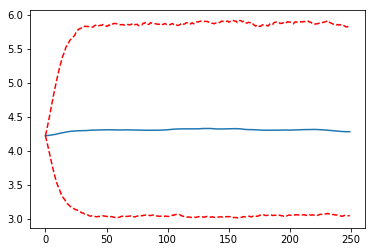

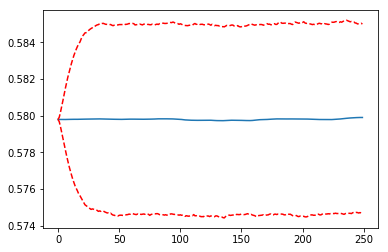

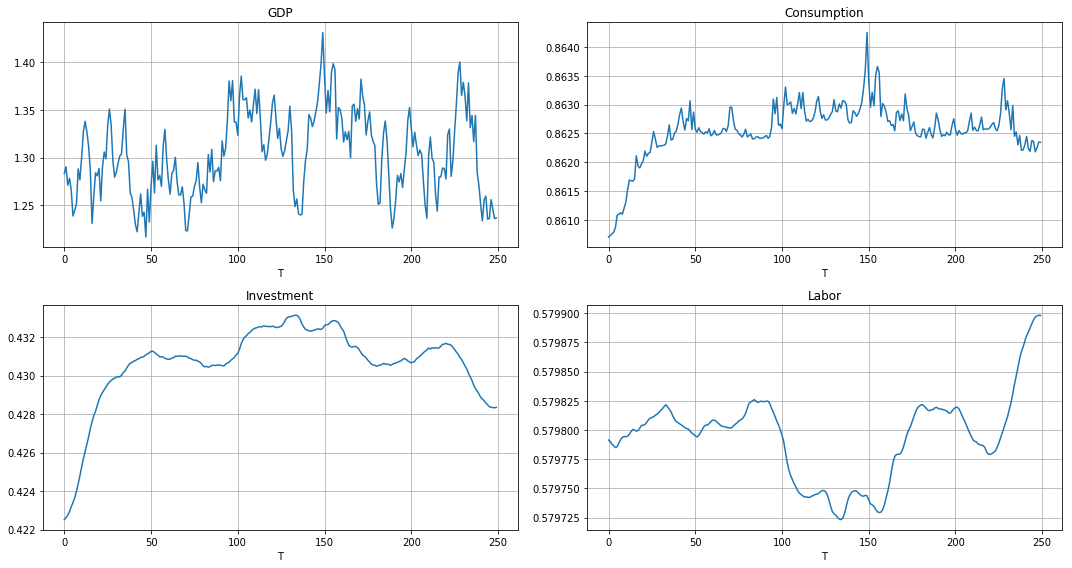

In [45]:
# EXERCISE 7
# set parameters
N = 10_000
T = 250
σ_z = np.sqrt(0.0004)
# generate time series for GDP, consumption, investment, and labor input
@njit
def generate_series(N, T, σ_z):
    z_vec = np.zeros(T)
    X_vec = np.zeros((T, 2))
    k_vec = np.zeros((T, N))
    l_vec = np.zeros((T, N))
    for n in range(N):    
        for i in range(1, T):            
            z_vec[i] = ρ_z * z_vec[i-1] + np.random.normal() * σ_z
            X_vec[i] = P @ X_vec[i-1, :] + Q * z_vec[i]
        k_vec[:, n] = np.exp(X_vec[:, 0]) * kbar
        l_vec[:, n] = np.exp(X_vec[:, 1]) * lbar
    return k_vec, l_vec, z_vec
kvec, lvec, zseries = generate_series(N, T, σ_z)
kseries = kvec.mean(axis=1)
highk = np.percentile(k_vec, 95, axis=1)
lowk = np.percentile(k_vec, 5, axis=1)
# plot for kseries
plt.plot(kseries)
plt.plot(highk, 'r--')
plt.plot(lowk, 'r--')
plt.show()
# plot for lseries
lseries = lvec.mean(axis=1)
highl = np.percentile(lvec, 95, axis=1)
lowl = np.percentile(lvec, 5, axis=1)
plt.plot(lseries)
plt.plot(highl, 'r--')
plt.plot(lowl, 'r--')
plt.show()
# calculations for output, investment, wage, interest rate, T, and c series
yseries = kseries ** α * lseries ** (1 - α) * np.exp(zseries)            
iseries = δ * kseries                                                   
wseries = (1 - α) * kseries ** α * (lseries * np.exp(zseries)) ** (-α)   
rseries = α * kseries ** (α - 1) * (lseries * np.exp(zseries)) ** (1 - α) 
Tseries = τ * (wseries * lseries + (rseries - δ) * kseries)
cseries = (1 - τ) * (wseries * lseries + (rseries - δ) * kseries) + Tseries
# plot GDP, consumption, investment, and labor input series
to_plot = [yseries, cseries, iseries, lseries]
titles = ['GDP', 'Consumption', 'Investment', 'Labor']
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for ax, plot, title in zip(axes.flatten(), to_plot, titles):
    ax.plot(plot)
    ax.set(title=title, xlabel='T')
    ax.grid()
plt.tight_layout()
plt.show()

In [47]:
# EXERCISE 8
# find capital and labor means and standard deviations
kmean = kvec.mean(axis=0)
kstd = kvec.std(axis=0)
lmean = lvec.mean(axis=0)
lstd = lvec.mean(axis=0)
# initialize vectors for capital and labor
vec = ['Capital', 'Labor']
for vec, vector in zip([kvec, lvec], vec):
    print('=' * 50)
    print(vector)
    print('=' * 50)
    print(f"Average mean: {vec.mean(axis=0).mean():.3f}")
    print(f"Standard deviation of mean: {vec.mean(axis=0).std():.3f}")
    print(f"Average standard deviation: {vec.std(axis=0).mean():.3f}")
    print(f"Standard deviation of standard deviation: {vec.std(axis=0).std():.3f}")
    print(f"Average cefficient of variation: {(vec.mean(axis=0) / vec.std(axis=0)).mean():.2f}")
    print(f"Standard deviation of cefficient of variation: {(vec.mean(axis=0) / vec.std(axis=0)).std():.2f}")
    print(f"Autocorrelation: {np.corrcoef(k_vec[1:], k_vec[:-1]).mean():.2f}")

Capital
Average mean: 4.307
Standard deviation of mean: 0.337
Average standard deviation: 0.749
Standard deviation of standard deviation: 0.192
Average cefficient of variation: 6.08
Standard deviation of cefficient of variation: 1.45
Autocorrelation: 0.15
Labor
Average mean: 0.580
Standard deviation of mean: 0.001
Average standard deviation: 0.003
Standard deviation of standard deviation: 0.001
Average cefficient of variation: 223.54
Standard deviation of cefficient of variation: 52.64
Autocorrelation: 0.15


/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log
/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/Users/sophiemsun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log


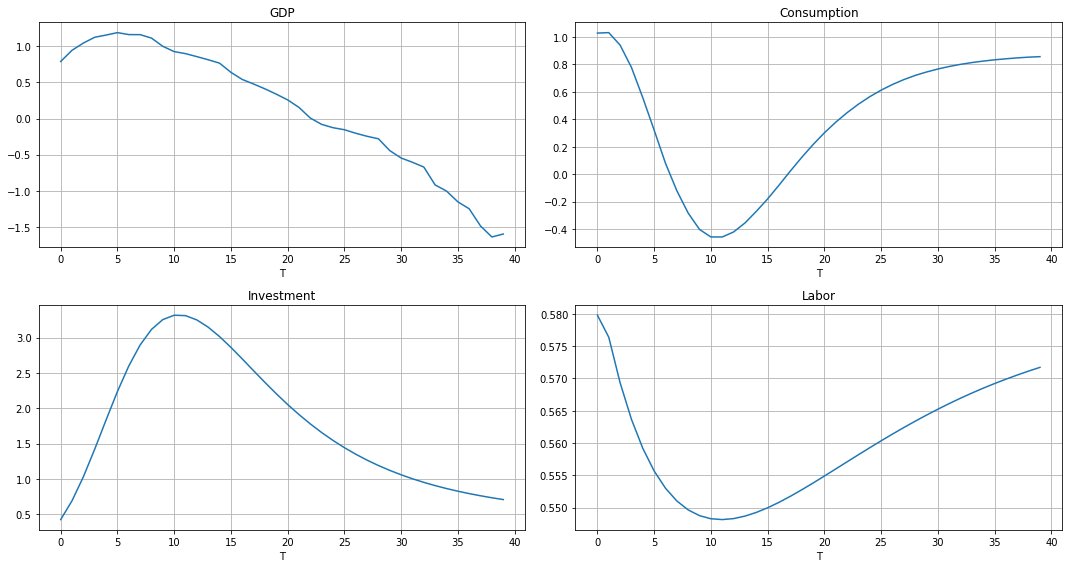

In [48]:
# EXERCISE 9
# set parameters
N = 10_000
T = 40
σ_z = np.sqrt(0.0004)
# generate impulse response functions for GDP, consumption, investment, and labor input
@njit
def generate_impulse(N, T, σ_z):
    zvec = np.zeros(T)
    zvec[0] = 1
    Xvec = np.zeros((T, 2))
    kvec = np.zeros((T, N))
    lvec = np.zeros((T, N))
    for n in range(N):    
        for i in range(1, T):            
            zvec[i] = ρ_z * zvec[i-1] + np.random.normal() * σ_z
            Xvec[i] = P @ Xvec[i-1, :] + Q * zvec[i]
        kvec[:, n] = np.exp(Xvec[:, 0]) * kbar
        lvec[:, n] = np.exp(Xvec[:, 1]) * lbar
    return kvec, lvec, zvec
kvec, lvec, zseries = generate_impulse(N, T, σ_z)
kseries = kvec.mean(axis=1)
lseries = lvec.mean(axis=1)
# calculate series for output, investment, wage, interest rate, T, and c
yseries = kseries ** α * lseries ** (1 - α) * np.exp(zseries) 
iseries = δ * kseries                                          
wseries = (1 - α) * kseries ** α * (lseries * np.exp(zseries)) ** (-α)
rseries = α * kseries ** (α - 1) * (lseries * np.exp(zseries)) ** (1 - α) 
Tseries = τ * (wseries * lseries + (rseries - δ) * kseries)
cseries = (1 - τ) * (wseries * lseries + (rseries - δ) * kseries) + Tseries
ychange = np.log(yseries - ybar)
cchange = np.log(cseries - cbar)
ichange = np.log(iseries - ibar)
lchange = np.log(lseries - lbar)
to_plot = [ychange, cseries, iseries, lseries]
titles = ['GDP', 'Consumption', 'Investment', 'Labor']
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for ax, plot, title in zip(axes.flatten(), to_plot, titles):
    ax.plot(plot)
    ax.set(title=title, xlabel='T')
    ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
PERTUBATION EXERCISES

EXERCISE 1
$$x"_{uu}(F"_{xx}x'_u + F'_{xu}) + F'_xx"'_{uuu} + x'_u(F"'_{xxx}x'_ux'_u + F'''_{xxu}x'_u $$ 
$$ + F"_{xx}x"_{uu} + F"'_{xuu} + F"'_{xux}x'_u) + x"_{uu}(F''_{xx}x'_u + F"_{xu}) $$ 
$$ + x'_u(F"'_{uuu} + F"'_{xux}x'_u) + F"_{xu}x"_{uu} + F"'_{uuu} + F"'_{uux}x'_u $$
$$ = 0$$

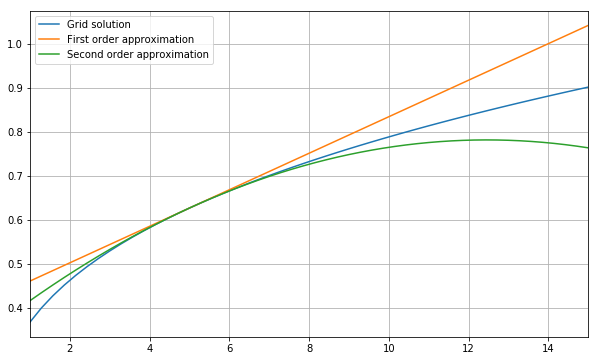

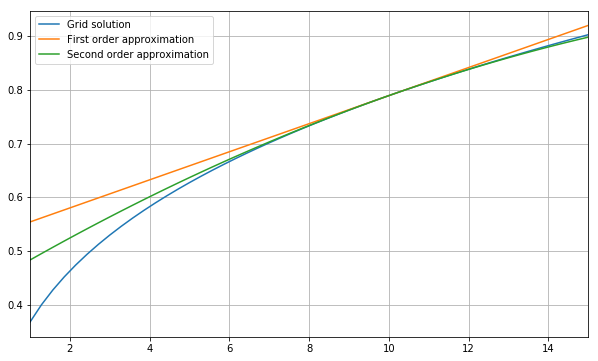

In [57]:
# EXERCISE 2
# set parameters
α = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24
def eq(w, z, k, t, h, b, α):
    demand = k * (((1 - α) * z) / w) ** (1 / α)
    profit = z * k ** α * demand ** (1 - α) - w * demand
    supply = h - (b / (w * (1 + b))) * (w * h + profit - t)
    return supply - demand
def w(k):  
    return fsolve(eq, 0.5, args=(z, k, t, h, b, α))
def f1(f, x0, ɛ = 1e-5):
    return (f(x0 + ɛ) - f(x0 - ɛ)) / (2 * ɛ)
def f2(f, x0, ɛ = 1e-5):
    return (f(x0 + ɛ) - 2 * f(x0) + f(x0 - ɛ)) / (ɛ**2)
# approximate k = 5
k0 = 5
kgrid = np.linspace(1, 15)
wapprox = w(k0) + f1(w, k0) * (kgrid - k0)
wapprox2 = w(k0) + f1(w, k0) * (kgrid - k0 ) + 0.5 * f2(w, k0) * (kgrid - k0) ** 2
wgrid = np.empty_like(kgrid)
for i, k in enumerate(kgrid):
    wgrid[i] = w(k)
plt.figure(figsize=(10, 6))
plt.plot(kgrid, wgrid, label='Grid solution')
plt.plot(kgrid, wapprox, label='First order approximation')
plt.plot(kgrid, wapprox2, label='Second order approximation')
plt.legend()
plt.xlim(1, 15)
plt.grid()
plt.show()
# approximate k = 10
k0 = 10 
kgrid = np.linspace(1, 15)
wapprox = w(k0) + f1(w, k0) * (kgrid - k0)
wapprox2 = w(k0) + f1(w, k0) * (kgrid - k0 ) + 0.5 * f2(w, k0) * (kgrid - k0) ** 2
plt.figure(figsize=(10, 6))
plt.plot(kgrid, wgrid, label='Grid solution')
plt.plot(kgrid, wapprox, label='First order approximation')
plt.plot(kgrid, wapprox2, label='Second order approximation')
plt.legend()
plt.xlim(1, 15)
plt.grid()
plt.show()

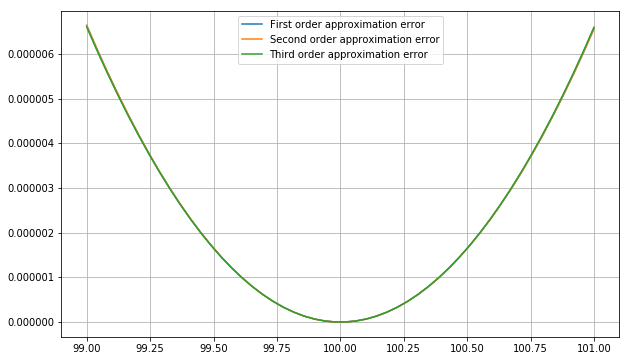

In [60]:
# EXERCISE 3
def f3(f, x0, ɛ = 1e-2):
    return (f(x0 + 2 * ɛ) - 2 * f(x0 + ɛ) + 2 * f(x0 - ɛ) - f(x0 - 2 * ɛ)) / (2 * ɛ ** 3)
F = lambda y, x: (x ** 0.35 + 0.9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)
def y(x):
    return fsolve(F, 50, args=(x))
x0 = 100
xgrid = np.linspace(99, 101)
yapprox = y(x0) + f1(y, x0) * (xgrid - x0)
yapprox2 = y(x0) + f1(y, x0) * (xgrid - x0) + 0.5 * f2(y, x0) * (xgrid - x0) ** 2
yapprox3 = y(x0) + f1(y, x0) * (xgrid - x0) + 0.5 * f2(y, x0) * (xgrid - x0) ** 2 + (1 / 6) * f3(y, x0) * (xgrid - x0) ** 3
ygrid = np.empty_like(xgrid)
for i, x in enumerate(xgrid):
    ygrid[i] = y(x)
plt.figure(figsize=(10, 6))
plt.plot(xgrid, yapprox - ygrid, label='First order approximation error')
plt.plot(xgrid, yapprox2 - ygrid, label='Second order approximation error')
plt.plot(xgrid, yapprox3 - ygrid, label='Third order approximation error')
plt.legend()
plt.grid()
plt.show()

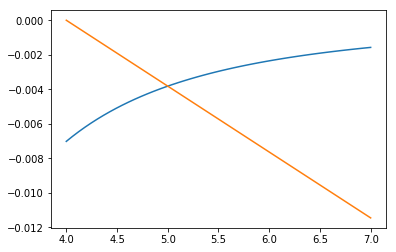

In [61]:
# EXERCISE 4
def H(K):
    return (α ** 2 * K ** (2 * (α - 1))) / (K ** α - K)
def H1(K):
    return 2 * (α - 1) * K ** (2 * α - 1) * (K ** α - K) - (α * K ** (α - 1) - 1) * (α ** 2 * K ** (2 * (α - 1))) / (K ** α - K) ** 2
K0 = 5
Kgrid = np.linspace(4, 7)
K = H(K0) + H(K0) * (Kgrid - K0)
plt.plot(Kgrid, H(Kgrid))
plt.plot(Kgrid, K)
plt.show()